In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from numpy import pi, sin,cos, arctan2, sqrt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kmeans2 import KMeansAlgorithm

In [9]:
flname="../dataset_cluster_warehouse_exp_1.csv"
df = pd.read_csv(flname)
df

,province_name,city_name,district_name,lat_long,avg_demand_baseline,demand_target,njop_2021_min,njop_2021_max
0,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,"-6.1548792,106.7204645",153,230,2300.0,14000.0
1,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,"-6.1639643,106.7506821",387,581,3700.0,35000.0
2,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,TAMAN SARI,"-6.1461655,106.8106198",114,171,7400.0,35400.0
3,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,TAMBORA,"-6.146188,106.8079118",36,54,4700.0,35800.0
4,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,"-6.1915513,106.7481174",771,1157,7000.0,20700.0
...,...,...,...,...,...,...,...,...
63,JAWA BARAT,KOTA DEPOK,BEJI,"-6.3723053,106.7830725",378,832,NaN,NaN
64,JAWA BARAT,KOTA DEPOK,CIMANGGIS,"-6.3723053,106.7830725",231,508,NaN,NaN
65,JAWA BARAT,KOTA DEPOK,CINERE,"-6.3324008,106.7732734",495,1089,NaN,NaN
66,JAWA BARAT,KOTA DEPOK,LIMO,"-6.3663032,106.7621014",264,581,NaN,NaN


In [10]:
# add distancce in dataframe from current loc

data_lat = []
data_long = []
for idx, row in df.iterrows():
    point = row['lat_long'].split(',')
    lat = float(point[0])
    long = float(point[1])
    data_lat.append(lat)
    data_long.append(long)

df = df.assign(lat=data_lat, long=data_long)
dataset = df[['city_name', 'district_name', 'avg_demand_baseline', 'demand_target', 'lat', 'long']]
dataset

,city_name,district_name,avg_demand_baseline,demand_target,lat,long
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,153,230,-6.154879,106.720465
1,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,387,581,-6.163964,106.750682
2,KOTA ADMINISTRASI JAKARTA BARAT,TAMAN SARI,114,171,-6.146166,106.810620
3,KOTA ADMINISTRASI JAKARTA BARAT,TAMBORA,36,54,-6.146188,106.807912
4,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,771,1157,-6.191551,106.748117
...,...,...,...,...,...,...
63,KOTA DEPOK,BEJI,378,832,-6.372305,106.783073
64,KOTA DEPOK,CIMANGGIS,231,508,-6.372305,106.783073
65,KOTA DEPOK,CINERE,495,1089,-6.332401,106.773273
66,KOTA DEPOK,LIMO,264,581,-6.366303,106.762101


In [11]:
lat_lng_dataset = dataset[['lat', 'long']]

train_dataset = lat_lng_dataset

In [12]:
#Rescaling
scaler = StandardScaler()

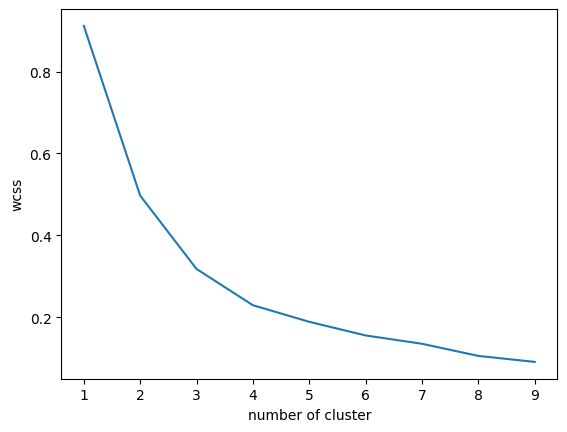

In [13]:
# Elbow method
wcss = []
crange = 10
for i in range(1, crange):
    kmeans = KMeans(n_clusters=i, init='random', random_state=50)
    kmeans.fit(train_dataset)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, crange), wcss)
plt.xlabel("number of cluster")
plt.ylabel("wcss")
plt.show()

In [14]:
km = KMeans(n_clusters=6, init='random', random_state=50)
km.fit(train_dataset)

KMeans(init='random', n_clusters=6, random_state=50)

In [16]:
clusters = km.cluster_centers_
print(clusters)

[[ -6.18884112 106.80086657]
 [ -6.17872579 106.64836309]
 [ -6.36194362 106.77081757]
 [ -6.27783246 106.87840535]
 [ -6.27952132 106.70809684]
 [ -6.17192113 106.87975596]]


In [17]:
y_km = km.fit_predict(train_dataset)
dataset = dataset.assign(pred=y_km)
dataset

,city_name,district_name,avg_demand_baseline,demand_target,lat,long,pred
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,153,230,-6.154879,106.720465,1
1,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,387,581,-6.163964,106.750682,0
2,KOTA ADMINISTRASI JAKARTA BARAT,TAMAN SARI,114,171,-6.146166,106.810620,0
3,KOTA ADMINISTRASI JAKARTA BARAT,TAMBORA,36,54,-6.146188,106.807912,0
4,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,771,1157,-6.191551,106.748117,0
...,...,...,...,...,...,...,...
63,KOTA DEPOK,BEJI,378,832,-6.372305,106.783073,2
64,KOTA DEPOK,CIMANGGIS,231,508,-6.372305,106.783073,2
65,KOTA DEPOK,CINERE,495,1089,-6.332401,106.773273,2
66,KOTA DEPOK,LIMO,264,581,-6.366303,106.762101,2


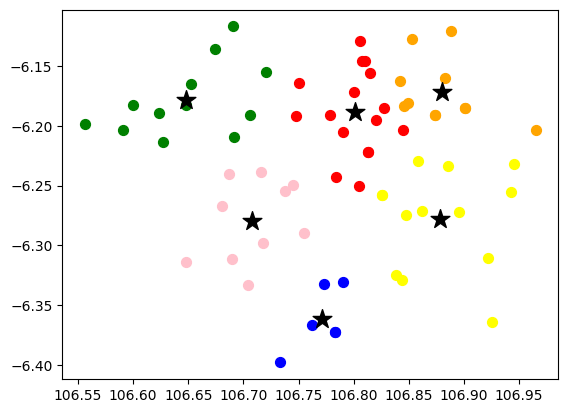

In [18]:
label_a = ("long",1)
label_b = ("lat", 0)
color_list = ["red", "green", "blue", "yellow", "pink", "orange", "purple"]
for i in range(6):
    plt.scatter(train_dataset[y_km==i][label_a[0]], train_dataset[y_km==i][label_b[0]], s=50, color=color_list[i%len(color_list)])
    plt.scatter(clusters[i][label_a[1]], clusters[i][label_b[1]], marker="*", s=200, color="black")

plt.show()


In [ ]:
#Silhoutte Score
s_score = silhouette_score(train_dataset, km.labels_, metric='euclidean')
print("sihoute score is ", s_score)